# Análisis Competitivo de Productos - Coppel México

**Fecha**: 2025-10-13  
**Objetivo**: Análisis exploratorio de datos obtenidos mediante web scraping de competidores de Coppel en la categoría de electrónica (refrigeradores).

## Contenido

1. [Configuración y Carga de Datos](#1.-Configuración-y-Carga-de-Datos)
2. [Limpieza y Validación de Datos](#2.-Limpieza-y-Validación-de-Datos)
3. [Análisis Exploratorio de Datos (EDA)](#3.-Análisis-Exploratorio-de-Datos)
4. [Análisis de Competitividad](#4.-Análisis-de-Competitividad)
5. [Análisis de Atributos Técnicos](#5.-Análisis-de-Atributos-Técnicos)
6. [Visualizaciones Avanzadas](#6.-Visualizaciones-Avanzadas)
7. [Insights y Recomendaciones](#7.-Insights-y-Recomendaciones)

## 1. Configuración y Carga de Datos

In [12]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime

# Configuración de visualización
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configuración de tamaño de figuras
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Librerías importadas correctamente")
print(f"Pandas versión: {pd.__version__}")
print(f"NumPy versión: {np.__version__}")

✓ Librerías importadas correctamente
Pandas versión: 2.3.3
NumPy versión: 2.1.3


In [13]:
# Carga de datasets
print("Cargando datasets...")

# Dataset 1: Exact Match Data
df_exact_match = pd.read_csv(
    'exact_match_data_2025-10-10_Coppel Mx_ELECTRONICS.csv',
    encoding='utf-8'
)

# Dataset 2: Detailed Analysis
df_detailed = pd.read_csv(
    'analyse_item_list_Coppel Mx (8).csv',
    encoding='utf-8'
)

print(f"\n✓ Dataset 'exact_match' cargado: {df_exact_match.shape[0]} filas x {df_exact_match.shape[1]} columnas")
print(f"✓ Dataset 'detailed' cargado: {df_detailed.shape[0]} filas x {df_detailed.shape[1]} columnas")

Cargando datasets...

✓ Dataset 'exact_match' cargado: 200 filas x 10 columnas
✓ Dataset 'detailed' cargado: 107 filas x 52 columnas


In [14]:
# Vista previa de los datos
print("=" * 80)
print("DATASET 1: EXACT MATCH DATA")
print("=" * 80)
display(df_exact_match.head())

print("\n" + "=" * 80)
print("DATASET 2: DETAILED ANALYSIS")
print("=" * 80)
display(df_detailed.head())

DATASET 1: EXACT MATCH DATA


,Sku_id,Name,Category,Brand,Url,Price,Discount,Out,Status,Difference
0,MKP-74381260,Refrigerador Tcl 6 Pies Cúbicos Con Dispensado...,IN > Electronics > Kitchen Appliances > Refrig...,tcl,https://www.coppel.com/refrigerador-tcl-6-pies...,4599.00,1150.00,True,Out Of Stock,0
1,MKP-74381190,Refrigerador Aurus Aru07wb 7p3 Dark Silver C/d...,IN > Electronics > Kitchen Appliances > Refrig...,aurus,https://www.coppel.com/refrigerador-aurus-aru0...,5109.00,2190.00,True,Out Of Stock,0
2,632724,Refrigerador Hisense RR63D6WWX Una Puerta 7 Pi...,IN > Electronics > Kitchen Appliances > Refrig...,hisense,https://www.coppel.com/refrigerador-hisense-rr...,5499.00,2500.00,True,Out Of Stock,0
3,625711,Refrigerador Hisense Una Puerta RR63D6WBX 7 Pi...,IN > Electronics > Kitchen Appliances > Refrig...,hisense,https://www.coppel.com/refrigerador-hisense-rr...,5599.00,3100.00,True,Out Of Stock,0
4,662933,Refrigerador Aspix Top Mount 7.3 Pies Negro RC...,IN > Electronics > Kitchen Appliances > Refrig...,aspix,https://www.coppel.com/refrigerador-aspix-top-...,5799.00,2900.00,True,Out Of Stock,0



DATASET 2: DETAILED ANALYSIS


,Mongo_id,Sku,Name,Price,Host,Brand,Currency,Category,Url,Discount,Discount_Percent,Availability,Category.1,Color,Washing_machine_type,Washing_machine_capacity,Washing_machine_model,Dryer_model,Refrigerator_model,Phone_model,Cooktop_model,Storage,Operating_system,Washing_program,Control_panel,Cooktop_size,Stove_type,Ignition,No_of_burners,Cooktop_type,Glass_stove_cover,Saving_energy_or_water,Control_panel.1,Special_features,No_of_doors,Refrigeration_and_cooling_technology,Shipping_time,Shipping_fees,Temperature_control,Display,No_of_drawers,Type_of_thaw,Freezer_location,Capacity_in_feet,Refrigerator_type,Semiautomatic,Product_emi_plan,Engine_displacement,Motorcycle_type,Helmet_type,Certification,Seller
0,682b2858e635c648ff03f414,"660,582",Refrigerador Mabe Top Mount 10 Pies Negro RMA2...,"12,499.0",Coppel Mx,Mabe,peso,Inicio > Línea Blanca > Refrigeradores y conge...,https://www.coppel.com/refrigerador-mabe-top-m...,"3,700.0",22.84,False,IN > Electronics > Kitchen Appliances > Refrig...,black,NaN,NaN,NaN,NaN,rma250pvmrp0,NaN,NaN,NaN,NaN,NaN,manual,NaN,NaN,NaN,NaN,NaN,NaN,yes,manual,NaN,2.00,NaN,*Dependerá del domicilio de entrega Recíbelo e...,Envío gratis*,NaN,NaN,1.00,NaN,top,10 feet,top mount,NaN,Desde $492 quincenales 11791 pesos en 24 quinc...,NaN,NaN,NaN,NaN,Coppel
1,682eafa32441b2e0540d5bda,"660,922",Refrigerador Samsung French Door 32 Pies Black...,"38,999.0",Coppel Mx,Samsung,peso,Inicio > Línea Blanca > Refrigeradores y conge...,https://www.coppel.com/refrigerador-samsung-fr...,"14,500.0",27.10,False,IN > Electronics > Kitchen Appliances > Refrig...,black,NaN,NaN,NaN,NaN,rf32cg5n10b1em,NaN,NaN,NaN,NaN,NaN,digital,NaN,NaN,NaN,NaN,NaN,NaN,yes,digital,NaN,2.00,smart inverter,*Dependerá del domicilio de entrega Recíbelo e...,Envío gratis*,NaN,NaN,4.00,automatic,bottom,32 feet,french door,NaN,"Desde $1,369 quincenales 32829 pesos en 24 qui...",NaN,NaN,NaN,NaN,Coppel
2,6835b88d6df69ea36b02853e,"74,381,197",Refrigerador Mabe Home Energy Saver 360 Lts Gr...,"15,990.0",Coppel Mx,Mabe,peso,Inicio > Línea Blanca > Refrigeradores y conge...,https://www.coppel.com/refrigerador-mabe-home-...,"3,531.0",18.09,False,IN > Electronics > Kitchen Appliances > Refrig...,grey,NaN,NaN,NaN,NaN,rme360pvmrm0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,multi air flow,*Dependerá del domicilio de entrega Recíbelo e...,Envío gratis*,NaN,NaN,NaN,NaN,NaN,12.71 cubic feet,NaN,NaN,Desde $753 quincenales 18066 pesos en 24 quinc...,NaN,NaN,NaN,NaN,Bomssa
3,682eafe72441b2e0540d5c0b,"665,118",Refrigerador Midea Side by Side 20 Pies Platea...,"26,499.0",Coppel Mx,Midea,peso,Inicio > Línea Blanca > Refrigeradores y conge...,https://www.coppel.com/pdp/refrigerador-midea-...,"8,500.0",24.29,False,IN > Electronics > Kitchen Appliances > Refrig...,silver,NaN,NaN,NaN,NaN,mdrs710fgm46,NaN,NaN,NaN,NaN,NaN,digital,NaN,NaN,NaN,NaN,NaN,NaN,yes,digital,NaN,2.00,inverter,*Dependerá del domicilio de entrega Recíbelo e...,Envío gratis*,NaN,NaN,4.00,automatic,side,20 feet,side-by-side,NaN,"Desde $1,006 quincenales 24119 pesos en 24 qui...",NaN,NaN,NaN,NaN,Coppel
4,682eb0c12441b2e0540d5cb7,"649,571",Refrigerador LG Top Mount 20 Pies Plateado LT5...,"19,799.0",Coppel Mx,Lg,peso,Inicio > Línea Blanca > Refrigeradores y conge...,https://www.coppel.com/refrigerador-lg-top-mou...,"4,900.0",19.84,False,IN > Electronics > Kitchen Appliances > Refrig...,silver,NaN,NaN,NaN,NaN,lt57bpsx.astfmxm,NaN,NaN,NaN,NaN,NaN,digital,NaN,NaN,NaN,NaN,NaN,NaN,yes,digital,NaN,2.00,inverter,*Dependerá del domicilio de entrega Recíbelo e...,Envío gratis*,NaN,NaN,2.00,automatic,top,20 feet,top mount,NaN,Desde $833 quincenales 19965 pesos en 24 quinc...,NaN,NaN,NaN,NaN,Coppel


In [15]:
# Información general de los datasets
print("\n📊 INFORMACIÓN DEL DATASET: EXACT MATCH")
print("=" * 80)
df_exact_match.info()

print("\n📊 INFORMACIÓN DEL DATASET: DETAILED ANALYSIS")
print("=" * 80)
df_detailed.info()


📊 INFORMACIÓN DEL DATASET: EXACT MATCH
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sku_id      136 non-null    object 
 1   Name        200 non-null    object 
 2   Category    200 non-null    object 
 3   Brand       199 non-null    object 
 4   Url         200 non-null    object 
 5   Price       200 non-null    float64
 6   Discount    200 non-null    float64
 7   Out         200 non-null    bool   
 8   Status      200 non-null    object 
 9   Difference  200 non-null    int64  
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 14.4+ KB

📊 INFORMACIÓN DEL DATASET: DETAILED ANALYSIS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 52 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   M

## 2. Limpieza y Validación de Datos

In [16]:
def clean_exact_match_data(df):
    """
    Limpia y prepara el dataset de exact match.
    
    Args:
        df (pd.DataFrame): DataFrame a limpiar
        
    Returns:
        pd.DataFrame: DataFrame limpio
    """
    df_clean = df.copy()
    
    # Convertir columnas numéricas
    numeric_cols = ['Price', 'Discount', 'Difference']
    for col in numeric_cols:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Convertir columnas booleanas
    df_clean['Out'] = df_clean['Out'].map({'true': True, 'false': False})
    
    # Limpiar nombres de marca (lowercase)
    df_clean['Brand'] = df_clean['Brand'].str.lower().str.strip()
    
    # Calcular precio final
    df_clean['Final_Price'] = df_clean['Price'] - df_clean['Discount']
    
    # Calcular porcentaje de descuento
    df_clean['Discount_Percent'] = (
        (df_clean['Discount'] / df_clean['Price']) * 100
    ).round(2)
    
    return df_clean


def clean_detailed_data(df):
    """
    Limpia y prepara el dataset detallado.
    
    Args:
        df (pd.DataFrame): DataFrame a limpiar
        
    Returns:
        pd.DataFrame: DataFrame limpio
    """
    df_clean = df.copy()
    
    # Limpiar columnas de precio (remover comas y convertir)
    price_cols = ['Price', 'Discount', 'Shipping_fees']
    for col in price_cols:
        if col in df_clean.columns:
            df_clean[col] = (
                df_clean[col]
                .astype(str)
                .str.replace(',', '')
                .str.replace('$', '')
                .str.strip()
            )
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    
    # Convertir Discount_Percent
    if 'Discount_Percent' in df_clean.columns:
        df_clean['Discount_Percent'] = pd.to_numeric(
            df_clean['Discount_Percent'], errors='coerce'
        )
    
    # Limpiar nombres de marca
    df_clean['Brand'] = df_clean['Brand'].str.lower().str.strip()
    
    # Calcular precio final
    df_clean['Final_Price'] = df_clean['Price'] - df_clean['Discount'].fillna(0)
    
    # Extraer capacidad numérica de Capacity_in_feet
    if 'Capacity_in_feet' in df_clean.columns:
        df_clean['Capacity_Numeric'] = (
            df_clean['Capacity_in_feet']
            .astype(str)
            .str.extract(r'(\d+(?:\.\d+)?)', expand=False)
            .astype(float)
        )
    
    # Convertir Availability a booleano
    if 'Availability' in df_clean.columns:
        df_clean['Availability'] = (
            df_clean['Availability']
            .map({'true': True, 'false': False})
            .fillna(False)
        )
    
    return df_clean


# Aplicar limpieza
print("Limpiando datasets...")
df_exact_clean = clean_exact_match_data(df_exact_match)
df_detailed_clean = clean_detailed_data(df_detailed)

print("\n✓ Datos limpiados correctamente")
print(f"  - Exact Match: {df_exact_clean.shape}")
print(f"  - Detailed: {df_detailed_clean.shape}")

Limpiando datasets...

✓ Datos limpiados correctamente
  - Exact Match: (200, 12)
  - Detailed: (107, 54)



ANÁLISIS DE VALORES NULOS: EXACT MATCH


,Columna,Valores Nulos,Porcentaje (%)
7,Out,200,100.00
0,Sku_id,64,32.00
3,Brand,1,0.50


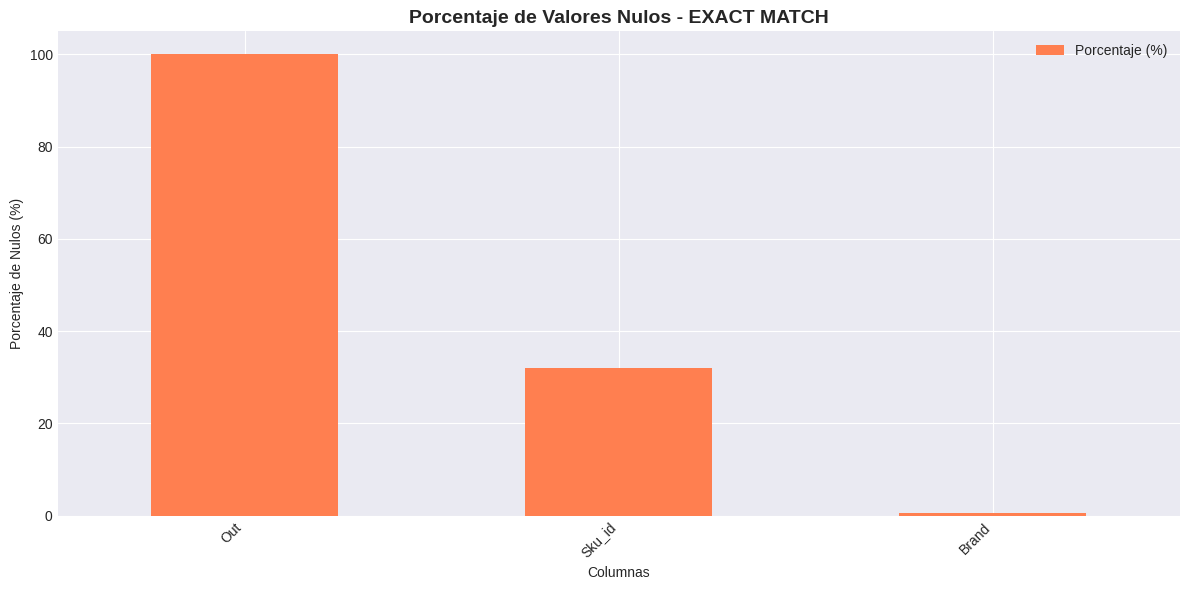


ANÁLISIS DE VALORES NULOS: DETAILED ANALYSIS


,Columna,Valores Nulos,Porcentaje (%)
14,Washing_machine_type,107,100.00
16,Washing_machine_model,107,100.00
15,Washing_machine_capacity,107,100.00
17,Dryer_model,107,100.00
19,Phone_model,107,100.00
48,Motorcycle_type,107,100.00
20,Cooktop_model,107,100.00
21,Storage,107,100.00
22,Operating_system,107,100.00
25,Cooktop_size,107,100.00


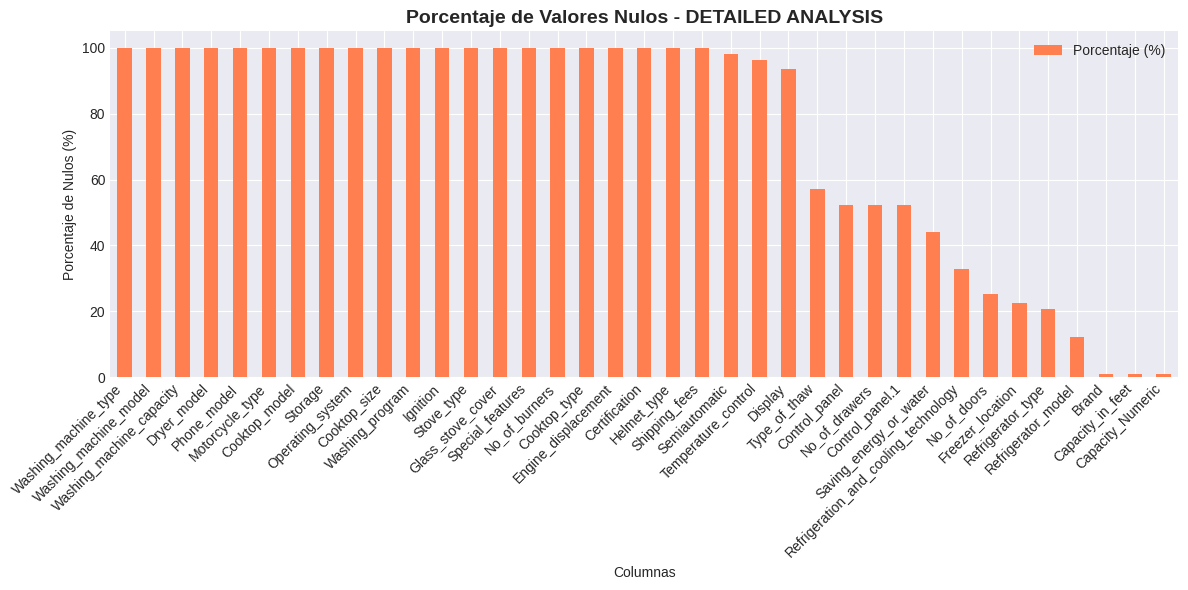

In [17]:
# Análisis de valores nulos
def analyze_missing_values(df, name):
    """
    Analiza y visualiza valores nulos en un DataFrame.
    """
    print(f"\n{'='*80}")
    print(f"ANÁLISIS DE VALORES NULOS: {name}")
    print(f"{'='*80}")
    
    missing = df.isnull().sum()
    missing_pct = round((missing / len(df) * 100), 2)
    
    missing_df = pd.DataFrame({
        'Columna': missing.index,
        'Valores Nulos': missing.values,
        'Porcentaje (%)': missing_pct.values
    })
    
    missing_df = missing_df[missing_df['Valores Nulos'] > 0].sort_values(
        'Valores Nulos', ascending=False
    )
    
    if len(missing_df) > 0:
        display(missing_df)
        
        # Visualización
        fig, ax = plt.subplots(figsize=(12, 6))
        missing_df.plot(x='Columna', y='Porcentaje (%)', kind='bar', ax=ax, color='coral')
        plt.title(f'Porcentaje de Valores Nulos - {name}', fontsize=14, fontweight='bold')
        plt.xlabel('Columnas')
        plt.ylabel('Porcentaje de Nulos (%)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("✓ No hay valores nulos en el dataset")


analyze_missing_values(df_exact_clean, 'EXACT MATCH')
analyze_missing_values(df_detailed_clean, 'DETAILED ANALYSIS')

## 3. Análisis Exploratorio de Datos (EDA)

In [18]:
# Estadísticas descriptivas
print("\n📈 ESTADÍSTICAS DESCRIPTIVAS - EXACT MATCH")
print("=" * 80)
display(df_exact_clean[['Price', 'Discount', 'Final_Price', 'Discount_Percent']].describe())

print("\n📈 ESTADÍSTICAS DESCRIPTIVAS - DETAILED")
print("=" * 80)
display(df_detailed_clean[['Price', 'Discount', 'Final_Price', 'Discount_Percent']].describe())


📈 ESTADÍSTICAS DESCRIPTIVAS - EXACT MATCH


,Price,Discount,Final_Price,Discount_Percent
count,200.00,200.00,200.00,200.00
mean,19264.69,5879.25,13385.43,31.13
std,12380.75,7964.37,12442.65,32.76
min,4599.00,0.00,-46801.00,0.00
25%,11999.00,2092.50,7724.00,16.06
50%,16842.50,3650.00,11699.00,26.23
75%,22524.00,7317.75,16576.50,36.36
max,91999.00,69800.00,91999.00,303.49



📈 ESTADÍSTICAS DESCRIPTIVAS - DETAILED


,Price,Discount,Final_Price,Discount_Percent
count,107.00,107.00,107.00,107.00
mean,18645.78,4269.79,14375.98,17.41
std,9695.82,3354.82,7308.64,7.59
min,6999.00,0.00,4499.00,0.00
25%,12549.00,2200.00,10154.00,14.96
50%,16499.00,3500.00,12199.00,18.61
75%,22894.00,5850.00,17249.00,22.34
max,75199.00,17200.00,57999.00,30.33


In [19]:
# Análisis de precios por marca
def analyze_prices_by_brand(df, title):
    """
    Analiza y visualiza precios por marca.
    """
    print(f"\n{'='*80}")
    print(f"ANÁLISIS DE PRECIOS POR MARCA - {title}")
    print(f"{'='*80}")
    
    brand_stats = df.groupby('Brand').agg({
        'Price': ['mean', 'median', 'min', 'max', 'count'],
        'Discount': 'mean',
        'Final_Price': 'mean'
    }).round(2)
    
    brand_stats.columns = ['_'.join(col).strip() for col in brand_stats.columns]
    brand_stats = brand_stats.sort_values('Price_mean', ascending=False)
    
    display(brand_stats.head(15))
    
    return brand_stats


brand_stats_exact = analyze_prices_by_brand(df_exact_clean, 'EXACT MATCH')
brand_stats_detailed = analyze_prices_by_brand(df_detailed_clean, 'DETAILED')


ANÁLISIS DE PRECIOS POR MARCA - EXACT MATCH


,Price_mean,Price_median,Price_min,Price_max,Price_count,Discount_mean,Final_Price_mean
Brand,,,,,,,
metalfrio,51361.50,51361.50,25468.00,77255.00,2,0.00,51361.50
samsung,28339.51,22999.00,10999.00,91999.00,41,9014.63,19324.88
cristel,26243.00,26243.00,26243.00,26243.00,1,0.00,26243.00
ge monogram,25999.00,25999.00,25999.00,25999.00,1,54500.00,-28501.00
whirlpool,20820.25,14999.00,9399.00,59999.00,24,7175.83,13644.42
lg,19856.84,19190.00,9999.00,34999.00,31,5712.23,14144.61
maytag,17799.00,17799.00,17799.00,17799.00,1,12200.00,5599.00
ge profile,17499.00,17499.00,17499.00,17499.00,1,13500.00,3999.00
mabe,17206.68,16399.00,8999.00,25299.00,25,5290.04,11916.64



ANÁLISIS DE PRECIOS POR MARCA - DETAILED


,Price_mean,Price_median,Price_min,Price_max,Price_count,Discount_mean,Final_Price_mean
Brand,,,,,,,
cristel,26243.00,26243.00,26243.00,26243.00,1,0.00,26243.00
samsung,25815.36,19999.00,12599.00,75199.00,22,6431.82,19383.55
metalfrio,25468.00,25468.00,25468.00,25468.00,1,0.00,25468.00
lg,22270.73,19799.00,13549.00,34999.00,11,5169.00,17101.73
whirlpool,19339.00,14349.00,12099.00,40799.00,10,4076.00,15263.00
hisense,17931.50,18659.00,8299.00,25999.00,12,5254.17,12677.33
mabe,17912.19,16799.00,8999.00,25299.00,16,4988.06,12924.12
midea,15893.17,14899.00,7699.00,29499.00,12,2898.33,12994.83
tcl,12915.00,11079.00,9999.00,19999.00,5,2844.00,10071.00


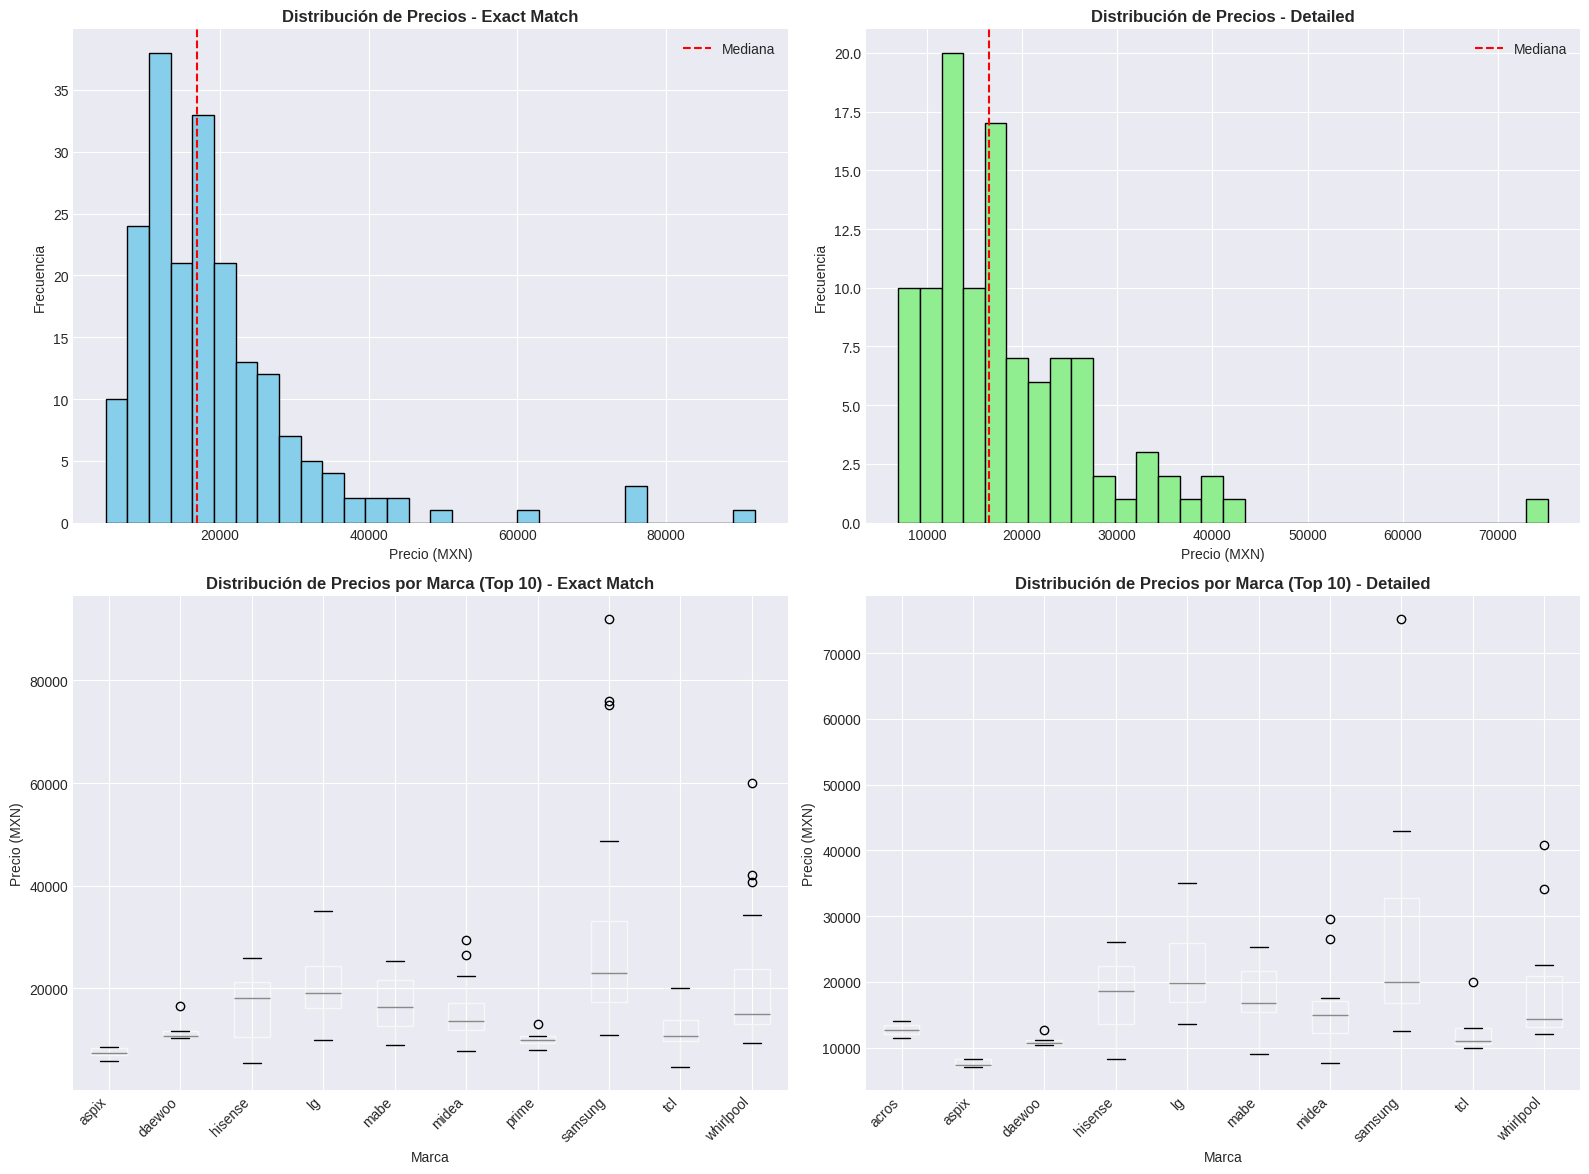

In [20]:
# Distribución de precios
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histograma de precios - Exact Match
axes[0, 0].hist(df_exact_clean['Price'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución de Precios - Exact Match', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Precio (MXN)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].axvline(df_exact_clean['Price'].median(), color='red', linestyle='--', label='Mediana')
axes[0, 0].legend()

# Histograma de precios - Detailed
axes[0, 1].hist(df_detailed_clean['Price'].dropna(), bins=30, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribución de Precios - Detailed', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Precio (MXN)')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].axvline(df_detailed_clean['Price'].median(), color='red', linestyle='--', label='Mediana')
axes[0, 1].legend()

# Box plot de precios por marca - Top 10 marcas (Exact Match)
top_brands_exact = df_exact_clean['Brand'].value_counts().head(10).index
df_top_exact = df_exact_clean[df_exact_clean['Brand'].isin(top_brands_exact)]
df_top_exact.boxplot(column='Price', by='Brand', ax=axes[1, 0], rot=45)
axes[1, 0].set_title('Distribución de Precios por Marca (Top 10) - Exact Match', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Marca')
axes[1, 0].set_ylabel('Precio (MXN)')
plt.sca(axes[1, 0])
plt.xticks(rotation=45, ha='right')

# Box plot de precios por marca - Top 10 marcas (Detailed)
top_brands_detailed = df_detailed_clean['Brand'].value_counts().head(10).index
df_top_detailed = df_detailed_clean[df_detailed_clean['Brand'].isin(top_brands_detailed)]
df_top_detailed.boxplot(column='Price', by='Brand', ax=axes[1, 1], rot=45)
axes[1, 1].set_title('Distribución de Precios por Marca (Top 10) - Detailed', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Marca')
axes[1, 1].set_ylabel('Precio (MXN)')
plt.sca(axes[1, 1])
plt.xticks(rotation=45, ha='right')

plt.suptitle('')
plt.tight_layout()
plt.show()

## 4. Análisis de Competitividad


🔍 ANÁLISIS DE DISPONIBILIDAD Y COMPETENCIA

Distribución por Status:
Status
No Competitor    108
Out Of Stock      92
Name: count, dtype: int64

Productos fuera de stock: 0 (0.0%)


IndexError: index 0 is out of bounds for axis 0 with size 0

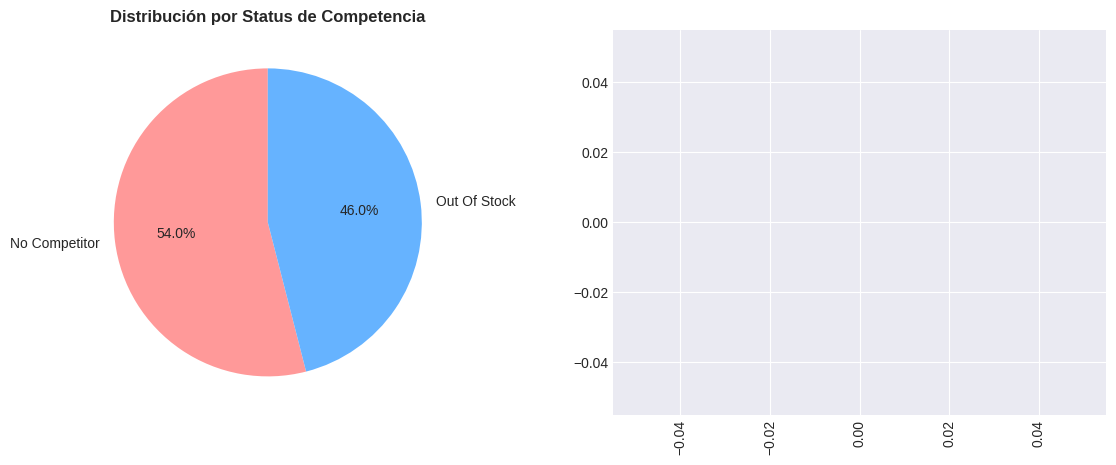

In [21]:
# Análisis de disponibilidad y competencia
print("\n🔍 ANÁLISIS DE DISPONIBILIDAD Y COMPETENCIA")
print("=" * 80)

# Status distribution
status_dist = df_exact_clean['Status'].value_counts()
print("\nDistribución por Status:")
print(status_dist)

# Out of stock analysis
out_of_stock_pct = round(df_exact_clean['Out'].sum() / len(df_exact_clean) * 100, 2)
print(f"\nProductos fuera de stock: {df_exact_clean['Out'].sum()} ({out_of_stock_pct}%)")

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart - Status
status_dist.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
axes[0].set_title('Distribución por Status de Competencia', fontsize=12, fontweight='bold')
axes[0].set_ylabel('')

# Bar chart - Out of Stock
out_data = df_exact_clean['Out'].value_counts()
out_data.plot(kind='bar', ax=axes[1], color=['#66b3ff', '#ff9999'])
axes[1].set_title('Productos en Stock vs Fuera de Stock', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Estado')
axes[1].set_ylabel('Cantidad')
axes[1].set_xticklabels(['En Stock', 'Fuera de Stock'], rotation=0)

plt.tight_layout()
plt.show()

In [22]:
# Análisis de descuentos
print("\n💰 ANÁLISIS DE DESCUENTOS")
print("=" * 80)

# Productos con descuento
productos_con_descuento_exact = df_exact_clean[df_exact_clean['Discount'] > 0]
productos_con_descuento_detailed = df_detailed_clean[df_detailed_clean['Discount'] > 0]

print(f"\nExact Match:")
print(f"  - Productos con descuento: {len(productos_con_descuento_exact)} de {len(df_exact_clean)}")
print(f"  - Descuento promedio: ${productos_con_descuento_exact['Discount'].mean():.2f} MXN")
print(f"  - Descuento promedio (%): {productos_con_descuento_exact['Discount_Percent'].mean():.2f}%")

print(f"\nDetailed:")
print(f"  - Productos con descuento: {len(productos_con_descuento_detailed)} de {len(df_detailed_clean)}")
print(f"  - Descuento promedio: ${productos_con_descuento_detailed['Discount'].mean():.2f} MXN")
print(f"  - Descuento promedio (%): {productos_con_descuento_detailed['Discount_Percent'].mean():.2f}%")

# Top 10 productos con mayor descuento porcentual
print("\n🏆 TOP 10 PRODUCTOS CON MAYOR DESCUENTO (%)")
top_discount_exact = df_exact_clean.nlargest(10, 'Discount_Percent')[[
    'Name', 'Brand', 'Price', 'Discount', 'Discount_Percent', 'Final_Price'
]]
display(top_discount_exact)


💰 ANÁLISIS DE DESCUENTOS

Exact Match:
  - Productos con descuento: 172 de 200
  - Descuento promedio: $6836.34 MXN
  - Descuento promedio (%): 36.20%

Detailed:
  - Productos con descuento: 96 de 107
  - Descuento promedio: $4759.04 MXN
  - Descuento promedio (%): 19.40%

🏆 TOP 10 PRODUCTOS CON MAYOR DESCUENTO (%)


,Name,Brand,Price,Discount,Discount_Percent,Final_Price
152,Refrigerador Samsung Family Hub French Door 31...,samsung,22999.00,69800.00,303.49,-46801.00
165,Refrigerador GE Monogram 22 Pies Café ZIR360NX...,ge monogram,25999.00,54500.00,209.62,-28501.00
56,Refrigerador IO Mabe Top Mount 19 Pies Platead...,io mabe,12299.00,18900.00,153.67,-6601.00
55,Refrigerador Mabe Top Mount 19 Pies Gris RMS51...,mabe,12299.00,13800.00,112.20,-1501.00
150,Refrigerador Whirlpool Side by Side 21 Pies Pl...,whirlpool,22599.00,22400.00,99.12,199.00
64,Refrigerador LG Top Mount 15 Pies Negro LT44AGD,lg,12999.00,12800.00,98.47,199.00
131,Refrigerador Samsung Bespoke Bottom 12ft Perso...,samsung,19799.00,19200.00,96.97,599.00
128,Refrigerador Samsung Side by Side 28 Pies Plat...,samsung,19499.00,18500.00,94.88,999.00
29,Refrigerador Teka Top Mount 14 Pies Acero RTF ...,teka,9999.00,9200.00,92.01,799.00
181,Refrigerador Whirlpool French Door 25 Pies Neg...,whirlpool,32499.00,27500.00,84.62,4999.00


In [ ]:
# Análisis de descuentos por marca
discount_by_brand_exact = df_exact_clean[df_exact_clean['Discount'] > 0].groupby('Brand').agg({
    'Discount': 'mean',
    'Discount_Percent': 'mean',
    'Price': 'count'
}).round(2)

discount_by_brand_exact.columns = ['Descuento_Promedio', 'Descuento_Pct', 'Num_Productos']
discount_by_brand_exact = discount_by_brand_exact.sort_values('Descuento_Pct', ascending=False).head(15)

print("\n📊 DESCUENTOS PROMEDIO POR MARCA (TOP 15)")
display(discount_by_brand_exact)

# Visualización
fig, ax = plt.subplots(figsize=(12, 6))
discount_by_brand_exact['Descuento_Pct'].plot(kind='barh', ax=ax, color='coral')
plt.title('Descuento Promedio (%) por Marca - Top 15', fontsize=14, fontweight='bold')
plt.xlabel('Descuento Promedio (%)')
plt.ylabel('Marca')
plt.tight_layout()
plt.show()

## 5. Análisis de Atributos Técnicos


🔧 ANÁLISIS DE ATRIBUTOS TÉCNICOS

Capacidad de Refrigeradores:
  - Promedio: 14.95 pies cúbicos
  - Mediana: 14.00 pies cúbicos
  - Rango: 7.00 - 32.00 pies cúbicos


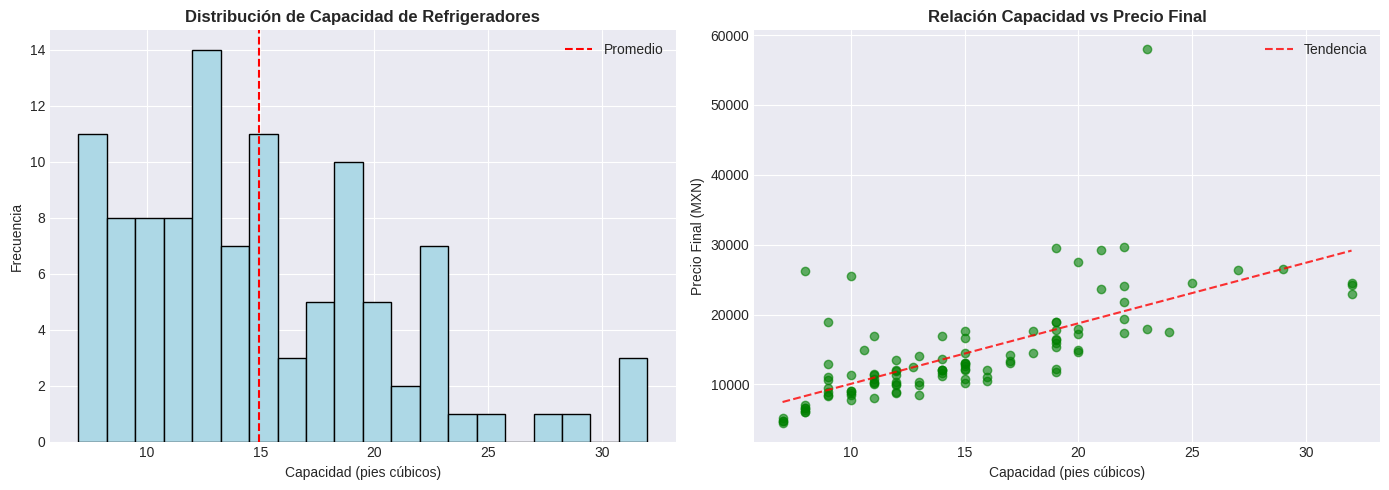

In [23]:
# Análisis de capacidad de refrigeradores
print("\n🔧 ANÁLISIS DE ATRIBUTOS TÉCNICOS")
print("=" * 80)

if 'Capacity_Numeric' in df_detailed_clean.columns:
    capacity_data = df_detailed_clean[df_detailed_clean['Capacity_Numeric'].notna()]
    
    print(f"\nCapacidad de Refrigeradores:")
    print(f"  - Promedio: {capacity_data['Capacity_Numeric'].mean():.2f} pies cúbicos")
    print(f"  - Mediana: {capacity_data['Capacity_Numeric'].median():.2f} pies cúbicos")
    print(f"  - Rango: {capacity_data['Capacity_Numeric'].min():.2f} - {capacity_data['Capacity_Numeric'].max():.2f} pies cúbicos")
    
    # Distribución de capacidades
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histograma
    axes[0].hist(capacity_data['Capacity_Numeric'], bins=20, color='lightblue', edgecolor='black')
    axes[0].set_title('Distribución de Capacidad de Refrigeradores', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Capacidad (pies cúbicos)')
    axes[0].set_ylabel('Frecuencia')
    axes[0].axvline(capacity_data['Capacity_Numeric'].mean(), color='red', linestyle='--', label='Promedio')
    axes[0].legend()
    
    # Relación capacidad vs precio
    axes[1].scatter(capacity_data['Capacity_Numeric'], capacity_data['Final_Price'], alpha=0.6, color='green')
    axes[1].set_title('Relación Capacidad vs Precio Final', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Capacidad (pies cúbicos)')
    axes[1].set_ylabel('Precio Final (MXN)')
    
    # Línea de tendencia
    z = np.polyfit(capacity_data['Capacity_Numeric'].dropna(), capacity_data['Final_Price'].dropna(), 1)
    p = np.poly1d(z)
    axes[1].plot(capacity_data['Capacity_Numeric'].sort_values(), 
                 p(capacity_data['Capacity_Numeric'].sort_values()), 
                 "r--", alpha=0.8, label='Tendencia')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()


🧊 ANÁLISIS DE TIPOS DE REFRIGERADOR

Distribución de Tipos:


Refrigerator_type
top mount       58
french door     13
side-by-side     9
bottom mount     4
mini fridge      1
Name: count, dtype: int64


Precio Promedio por Tipo:


,Precio_Promedio,Precio_Mediana,Cantidad
Refrigerator_type,,,
side-by-side,25067.89,17999.00,9
french door,22552.85,24099.00,13
bottom mount,17249.00,17749.00,4
mini fridge,12184.00,12184.00,1
top mount,11214.28,11139.00,58


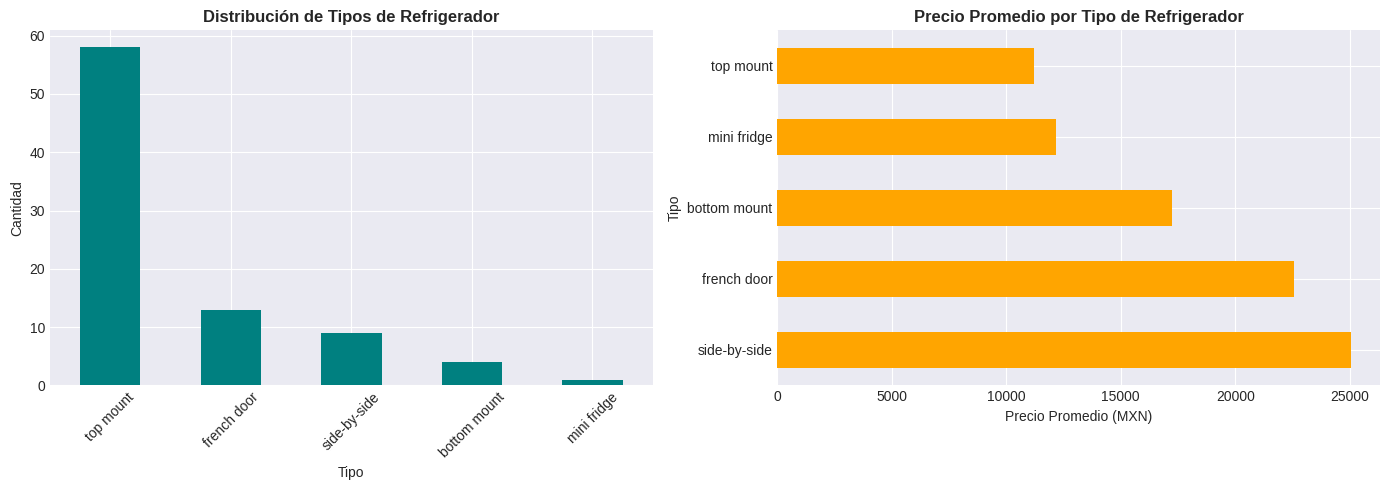

In [24]:
# Análisis de tipos de refrigeradores
if 'Refrigerator_type' in df_detailed_clean.columns:
    print("\n🧊 ANÁLISIS DE TIPOS DE REFRIGERADOR")
    print("=" * 80)
    
    refrig_type_dist = df_detailed_clean['Refrigerator_type'].value_counts()
    print("\nDistribución de Tipos:")
    display(refrig_type_dist)
    
    # Precio promedio por tipo
    price_by_type = df_detailed_clean.groupby('Refrigerator_type')['Final_Price'].agg(['mean', 'median', 'count']).round(2)
    price_by_type.columns = ['Precio_Promedio', 'Precio_Mediana', 'Cantidad']
    price_by_type = price_by_type.sort_values('Precio_Promedio', ascending=False)
    
    print("\nPrecio Promedio por Tipo:")
    display(price_by_type)
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Distribución de tipos
    refrig_type_dist.plot(kind='bar', ax=axes[0], color='teal')
    axes[0].set_title('Distribución de Tipos de Refrigerador', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Tipo')
    axes[0].set_ylabel('Cantidad')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Precio promedio por tipo
    price_by_type['Precio_Promedio'].plot(kind='barh', ax=axes[1], color='orange')
    axes[1].set_title('Precio Promedio por Tipo de Refrigerador', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Precio Promedio (MXN)')
    axes[1].set_ylabel('Tipo')
    
    plt.tight_layout()
    plt.show()


🎨 ANÁLISIS DE COLORES

Top 10 Colores Más Populares:


Color_Clean
grey      52
silver    30
black     18
white      6
blue       1
Name: count, dtype: int64

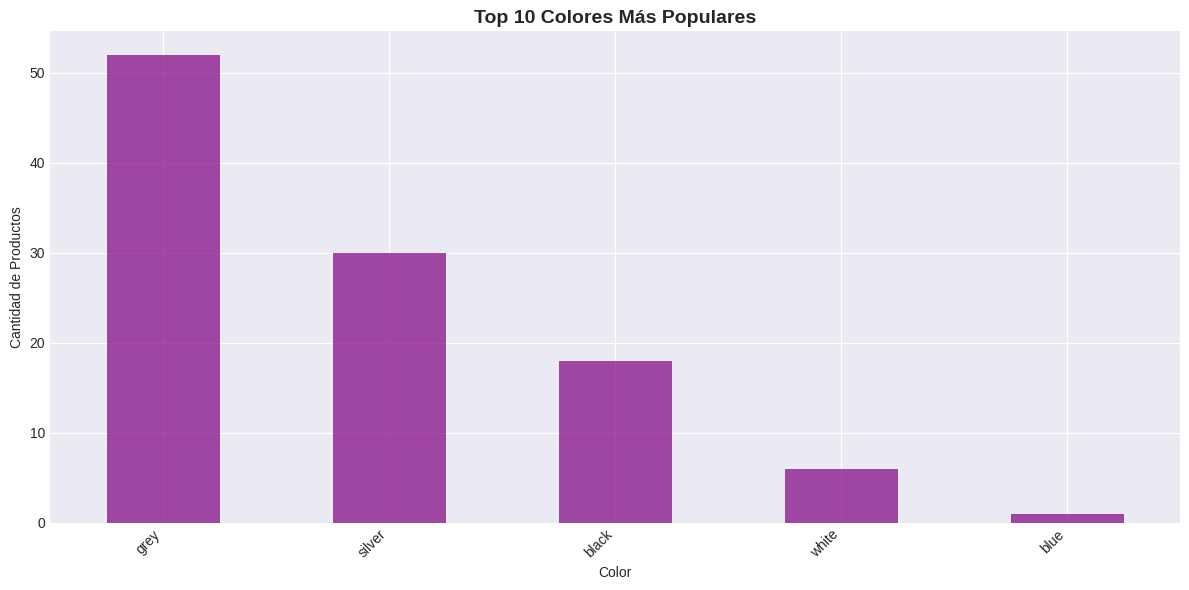

In [25]:
# Análisis de colores más populares
if 'Color' in df_detailed_clean.columns:
    print("\n🎨 ANÁLISIS DE COLORES")
    print("=" * 80)
    
    # Limpiar y normalizar colores
    df_detailed_clean['Color_Clean'] = (
        df_detailed_clean['Color']
        .astype(str)
        .str.lower()
        .str.strip()
        .str.split(',')
        .str[0]  # Tomar primer color si hay múltiples
    )
    
    color_dist = df_detailed_clean['Color_Clean'].value_counts().head(10)
    print("\nTop 10 Colores Más Populares:")
    display(color_dist)
    
    # Visualización
    fig, ax = plt.subplots(figsize=(12, 6))
    color_dist.plot(kind='bar', ax=ax, color='purple', alpha=0.7)
    plt.title('Top 10 Colores Más Populares', fontsize=14, fontweight='bold')
    plt.xlabel('Color')
    plt.ylabel('Cantidad de Productos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## 6. Visualizaciones Avanzadas

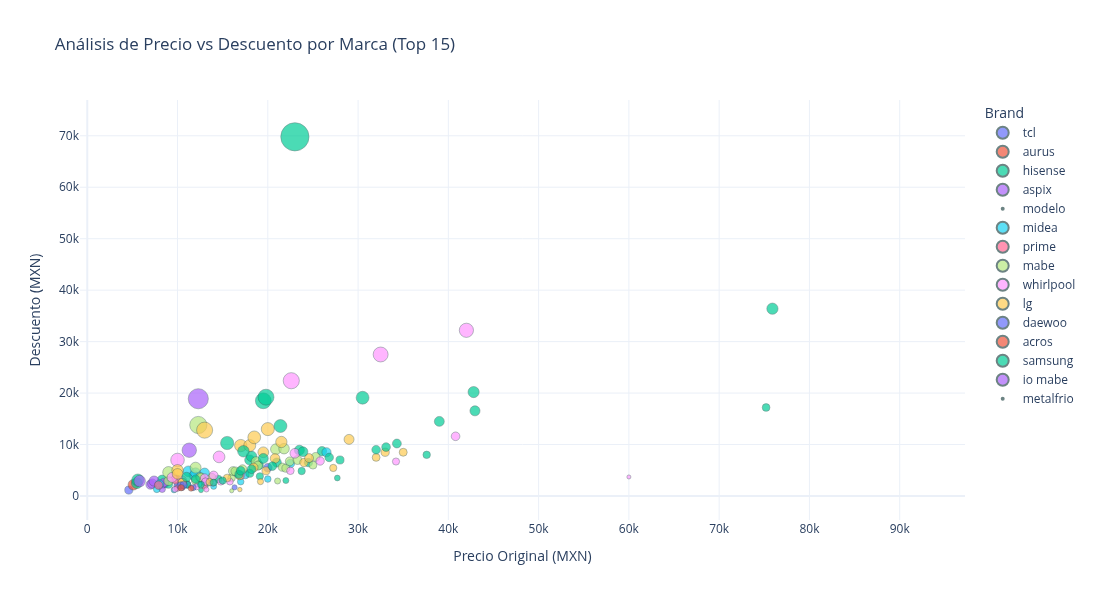

In [26]:
# Visualización interactiva con Plotly - Precio vs Descuento por Marca
top_brands = df_exact_clean['Brand'].value_counts().head(15).index
df_plot = df_exact_clean[df_exact_clean['Brand'].isin(top_brands)]

fig = px.scatter(
    df_plot,
    x='Price',
    y='Discount',
    color='Brand',
    size='Discount_Percent',
    hover_data=['Name', 'Final_Price', 'Status'],
    title='Análisis de Precio vs Descuento por Marca (Top 15)',
    labels={'Price': 'Precio Original (MXN)', 'Discount': 'Descuento (MXN)'},
    template='plotly_white',
    height=600
)

fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))
fig.show()

In [27]:
# Sunburst chart - Jerarquía de precios por marca y status
df_sunburst = df_exact_clean.copy()
df_sunburst['Price_Range'] = pd.cut(
    df_sunburst['Price'],
    bins=[0, 10000, 20000, 30000, 100000],
    labels=['<10K', '10K-20K', '20K-30K', '>30K']
)

fig = px.sunburst(
    df_sunburst,
    path=['Price_Range', 'Brand', 'Status'],
    values='Price',
    title='Distribución Jerárquica: Rango de Precio > Marca > Status',
    color='Price',
    color_continuous_scale='RdYlGn_r',
    height=700
)

fig.show()

ValueError: ('None entries cannot have not-None children', ('<10K', 'aspix', 'No Competitor'))


📊 MATRIZ DE CORRELACIÓN


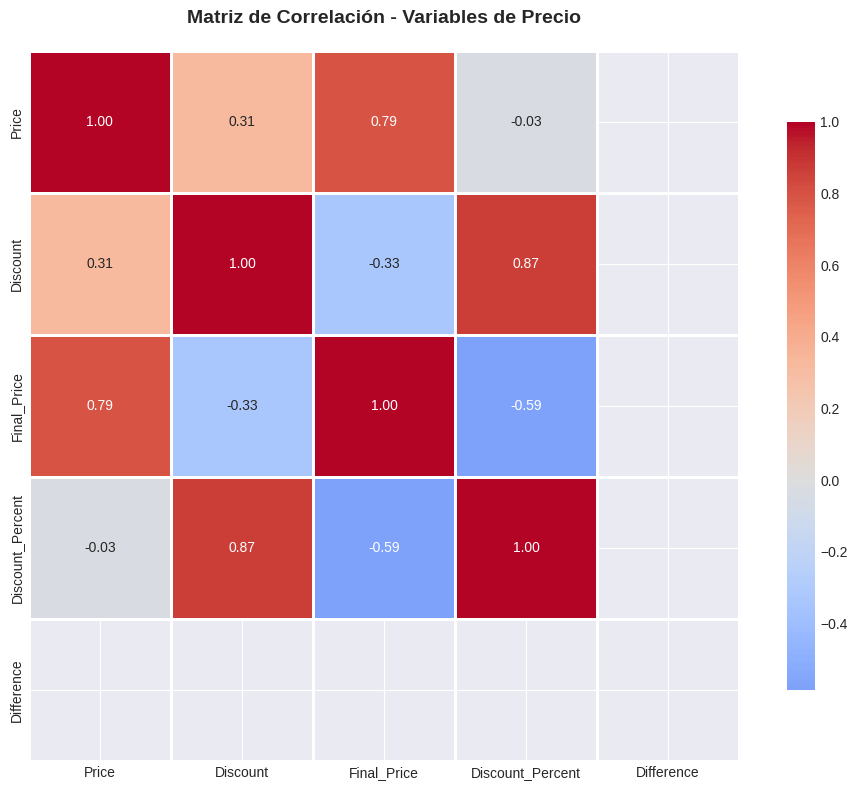

In [28]:
# Heatmap de correlación
print("\n📊 MATRIZ DE CORRELACIÓN")
print("=" * 80)

# Seleccionar columnas numéricas relevantes
numeric_cols_exact = ['Price', 'Discount', 'Final_Price', 'Discount_Percent', 'Difference']
corr_matrix_exact = df_exact_clean[numeric_cols_exact].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr_matrix_exact,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={'shrink': 0.8},
    ax=ax
)
plt.title('Matriz de Correlación - Variables de Precio', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 7. Insights y Recomendaciones

In [29]:
# Generar insights automáticos
print("\n🎯 INSIGHTS Y HALLAZGOS CLAVE")
print("=" * 80)

# 1. Productos sin competencia
no_competitor = df_exact_clean[df_exact_clean['Status'] == 'No Competitor']
print(f"\n1. OPORTUNIDADES DE MERCADO")
print(f"   - Productos sin competencia identificada: {len(no_competitor)} ({len(no_competitor)/len(df_exact_clean)*100:.1f}%)")
print(f"   - Valor total de inventario sin competencia: ${no_competitor['Final_Price'].sum():,.2f} MXN")

# 2. Productos fuera de stock
out_of_stock = df_exact_clean[df_exact_clean['Out'] == True]
print(f"\n2. DISPONIBILIDAD")
print(f"   - Productos fuera de stock: {len(out_of_stock)} ({len(out_of_stock)/len(df_exact_clean)*100:.1f}%)")
print(f"   - Oportunidad de venta perdida: ${out_of_stock['Final_Price'].sum():,.2f} MXN")

# 3. Análisis de pricing
avg_discount_pct = df_exact_clean[df_exact_clean['Discount'] > 0]['Discount_Percent'].mean()
print(f"\n3. ESTRATEGIA DE PRECIOS")
print(f"   - Descuento promedio en el mercado: {avg_discount_pct:.2f}%")
print(f"   - Precio promedio de mercado: ${df_exact_clean['Final_Price'].mean():,.2f} MXN")
print(f"   - Rango de precios: ${df_exact_clean['Final_Price'].min():,.2f} - ${df_exact_clean['Final_Price'].max():,.2f} MXN")

# 4. Marcas más competitivas
brand_count = df_exact_clean['Brand'].value_counts()
print(f"\n4. COMPETENCIA POR MARCA")
print(f"   - Total de marcas identificadas: {len(brand_count)}")
print(f"   - Top 5 marcas con más productos:")
for i, (brand, count) in enumerate(brand_count.head(5).items(), 1):
    print(f"     {i}. {brand.title()}: {count} productos")

# 5. Análisis de capacidad (si disponible)
if 'Capacity_Numeric' in df_detailed_clean.columns:
    capacity_data = df_detailed_clean[df_detailed_clean['Capacity_Numeric'].notna()]
    avg_capacity = capacity_data['Capacity_Numeric'].mean()
    print(f"\n5. CARACTERÍSTICAS TÉCNICAS")
    print(f"   - Capacidad promedio: {avg_capacity:.2f} pies cúbicos")
    print(f"   - Capacidad más común: {capacity_data['Capacity_Numeric'].mode().values[0]:.1f} pies cúbicos")

print("\n" + "=" * 80)


🎯 INSIGHTS Y HALLAZGOS CLAVE

1. OPORTUNIDADES DE MERCADO
   - Productos sin competencia identificada: 108 (54.0%)
   - Valor total de inventario sin competencia: $1,550,850.00 MXN

2. DISPONIBILIDAD
   - Productos fuera de stock: 0 (0.0%)
   - Oportunidad de venta perdida: $0.00 MXN

3. ESTRATEGIA DE PRECIOS
   - Descuento promedio en el mercado: 36.20%
   - Precio promedio de mercado: $13,385.43 MXN
   - Rango de precios: $-46,801.00 - $91,999.00 MXN

4. COMPETENCIA POR MARCA
   - Total de marcas identificadas: 24
   - Top 5 marcas con más productos:
     1. Samsung: 41 productos
     2. Lg: 31 productos
     3. Mabe: 25 productos
     4. Whirlpool: 24 productos
     5. Midea: 20 productos

5. CARACTERÍSTICAS TÉCNICAS
   - Capacidad promedio: 14.95 pies cúbicos
   - Capacidad más común: 15.0 pies cúbicos



In [30]:
# Recomendaciones estratégicas
print("\n💡 RECOMENDACIONES ESTRATÉGICAS")
print("=" * 80)

print("""
1. OPTIMIZACIÓN DE PRECIOS:
   • Evaluar ajuste de precios en productos con descuentos significativamente mayores 
     a la media del mercado ({:.2f}%)
   • Considerar descuentos estratégicos en productos sin competencia identificada
   • Implementar dynamic pricing basado en disponibilidad de competencia

2. GESTIÓN DE INVENTARIO:
   • Priorizar reabastecimiento de {} productos fuera de stock
   • Oportunidad estimada de venta: ${:,.2f} MXN
   • Implementar sistema de alertas para productos con alta rotación

3. INTELIGENCIA COMPETITIVA:
   • Monitorear continuamente los {} productos sin match de competencia
   • Establecer benchmarks de precio por marca y capacidad
   • Implementar tracking automático de cambios de precio

4. ESTRATEGIA DE PRODUCTO:
   • Diversificar portafolio en rangos de capacidad con alta demanda
   • Evaluar entrada a segmentos de precio premium (>$30,000 MXN)
   • Fortalecer oferta en marcas top con alto volumen

5. ANÁLISIS CONTINUO:
   • Implementar dashboard de monitoreo en tiempo real
   • Actualizar datos de scraping con frecuencia semanal
   • Desarrollar modelos predictivos de elasticidad de precio
""".format(
    avg_discount_pct,
    len(out_of_stock),
    out_of_stock['Final_Price'].sum(),
    len(no_competitor)
))

print("=" * 80)


💡 RECOMENDACIONES ESTRATÉGICAS

1. OPTIMIZACIÓN DE PRECIOS:
   • Evaluar ajuste de precios en productos con descuentos significativamente mayores 
     a la media del mercado (36.20%)
   • Considerar descuentos estratégicos en productos sin competencia identificada
   • Implementar dynamic pricing basado en disponibilidad de competencia

2. GESTIÓN DE INVENTARIO:
   • Priorizar reabastecimiento de 0 productos fuera de stock
   • Oportunidad estimada de venta: $0.00 MXN
   • Implementar sistema de alertas para productos con alta rotación

3. INTELIGENCIA COMPETITIVA:
   • Monitorear continuamente los 108 productos sin match de competencia
   • Establecer benchmarks de precio por marca y capacidad
   • Implementar tracking automático de cambios de precio

4. ESTRATEGIA DE PRODUCTO:
   • Diversificar portafolio en rangos de capacidad con alta demanda
   • Evaluar entrada a segmentos de precio premium (>$30,000 MXN)
   • Fortalecer oferta en marcas top con alto volumen

5. ANÁLISIS CONTIN

In [31]:
# Exportar resultados clave
print("\n💾 EXPORTANDO RESULTADOS")
print("=" * 80)

# Crear carpeta de outputs si no existe
import os
os.makedirs('outputs', exist_ok=True)

# Exportar productos sin competencia
no_competitor.to_csv('outputs/productos_sin_competencia.csv', index=False)
print("✓ Exportado: productos_sin_competencia.csv")

# Exportar productos fuera de stock
out_of_stock.to_csv('outputs/productos_fuera_stock.csv', index=False)
print("✓ Exportado: productos_fuera_stock.csv")

# Exportar top productos con descuento
top_discount_exact.to_csv('outputs/top_descuentos.csv', index=False)
print("✓ Exportado: top_descuentos.csv")

# Exportar estadísticas por marca
brand_stats_exact.to_csv('outputs/estadisticas_por_marca.csv')
print("✓ Exportado: estadisticas_por_marca.csv")

print("\n✓ Todos los archivos exportados exitosamente a la carpeta 'outputs/'")


💾 EXPORTANDO RESULTADOS
✓ Exportado: productos_sin_competencia.csv
✓ Exportado: productos_fuera_stock.csv
✓ Exportado: top_descuentos.csv
✓ Exportado: estadisticas_por_marca.csv

✓ Todos los archivos exportados exitosamente a la carpeta 'outputs/'


---

## Conclusión

Este análisis proporciona una visión completa del panorama competitivo de Coppel México en la categoría de refrigeradores. Los datos recopilados mediante web scraping permiten identificar oportunidades de optimización de precios, gestión de inventario y estrategia de producto.

### Próximos Pasos Recomendados:

1. **Automatización**: Implementar pipeline de actualización automática de datos
2. **Dashboard**: Crear dashboard interactivo con Plotly Dash o Streamlit
3. **Modelos Predictivos**: Desarrollar modelos de elasticidad de precio y forecasting
4. **Alertas**: Sistema de notificaciones para cambios significativos en competencia
5. **Expansión**: Extender análisis a otras categorías de productos

---

**Documento generado**: {}

**Analista**: Sistema Automatizado de Análisis Competitivo
".format(datetime.now().strftime('%Y-%m-%d %H:%M:%S'))